In [14]:
import matplotlib.pyplot as plt

from qlearner import QLearning
from adp import CartPoleADP
from mutual import MutHook
from IPython.display import clear_output
import gym

adp = CartPoleADP(
    nbins=9,
    gamma=0.99
)
qlrn_mut = QLearning(
    gamma=0.99,
    mutual_steps=1000
)
qlrn_std = QLearning(
    gamma=0.99
)

hook = MutHook(adp)

qlrn_mut.set_mutual_agents([adp])
qlrn_mut.set_mutual_hook(hook)

In [15]:
envs = [gym.make('CartPole-v1') for _ in range(3)]
s_s = [env.reset() for env in envs]
agts = [adp, qlrn_mut, qlrn_std]
l_s = [[], [], []]
r_s = [0, 0, 0, 0]
    
for step in range(5000):
    clear_output(wait=True)
    print(step)
    for agt, env, s, loss_log, idx in zip(agts, envs, s_s, l_s, range(3)):
        a = agt.get_action(s)
        sp, r, done, _ = env.step(a)
        r_s[idx] += r
        l = agt.handle_transition(s, a, r, sp, done)
        print(l)
        loss_log.append(l)
        s = sp
        
        if done:
            done = False
            s = env.reset()
            r_s[idx] = 0
            
        s_s[idx] = s

4999
None
(16.111820220947266, tensor(16.1118, grad_fn=<MseLossBackward>), 0)
(3585327.5, tensor(3585327.5000, grad_fn=<MseLossBackward>), 0)


In [16]:
r_s

[159.0, 14.0, 45.0, 0]

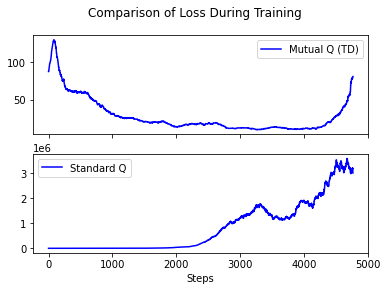

In [81]:
fig, (t, b) = plt.subplots(nrows=2, sharex=True)

#t.plot(np.log(np.convolve([l[0] for l in l_s[1][31:]], np.ones(200) / 200, mode='valid')), label='Mutual Q', color='red')
t.plot(np.convolve([l[1].item() for l in l_s[1][31:]], np.ones(200) / 200, mode='valid'), label='Mutual Q (TD)', color='blue')

b.plot(np.convolve([l[0] for l in l_s[2][31:]], np.ones(200) / 200, mode='valid'), label='Standard Q', color='blue')

b.legend()
t.legend()

b.set_xlabel('Steps')

fig.suptitle('Comparison of Loss During Training')
plt.show()